<a href="https://colab.research.google.com/github/goutham-120/EDAV_PROJECT_traffic_signal_wait_time_study/blob/main/Copy_of_EDAV_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("/content/sample_data/signal_time_data.csv")
df['wait_time_minutes']=df['wait_time_seconds']/60

df.head()

,intersection_id,time_of_day,vehicle_count,wait_time_seconds,wait_time_minutes
0,1,Morning,195,131.4,2.190000
1,2,Noon,223,135.6,2.260000
2,3,Morning,202,128.7,2.145000
3,4,Night,23,29.9,0.498333
4,5,Noon,49,96.0,1.600000


In [ ]:
avg_wait_by_time=df.groupby('time_of_day')['wait_time_minutes'].mean()
print("\nComputed average wait_time by time_of_day\n")
print(avg_wait_by_time)



Computed average wait_time by time_of_day

time_of_day
Evening    2.257801
Morning    1.863137
Night      1.140000
Noon       1.660136
Name: wait_time_minutes, dtype: float64


In [ ]:
bins=[0,10,30,60,100,np.inf]
labels=['0-10','10-30','30-60','60-100','100+']
df['vehicle_range']=pd.cut(df['vehicle_count'],bins=bins,labels=labels)
print("\ngrouped by vehicle count range\n");


grouped by vehicle count range



In [ ]:
mean_wait=df['wait_time_minutes'].mean()
df['wait_time_minutes'].fillna(mean_wait,inplace=True)
print("\nreplaced missing wait_time values with mean\n")
print(df.head())
corr = df['vehicle_count'].corr(df['wait_time_minutes'])
print("\nCorrelation between traffic intensity with wait_time is")
print(corr)


replaced missing wait_time values with mean

   intersection_id time_of_day  vehicle_count  wait_time_seconds  \
0                1     Morning            195              131.4   
1                2        Noon            223              135.6   
2                3     Morning            202              128.7   
3                4       Night             23               29.9   
4                5        Noon             49               96.0   

   wait_time_minutes vehicle_range  
0           2.190000          100+  
1           2.260000          100+  
2           2.145000          100+  
3           0.498333         10-30  
4           1.600000         30-60  

Correlation between traffic intensity with wait_time is
0.6366049951335908


/tmp/ipython-input-2087064581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wait_time_minutes'].fillna(mean_wait,inplace=True)


heatmap between time_of_day and avg_wait_time_minutes


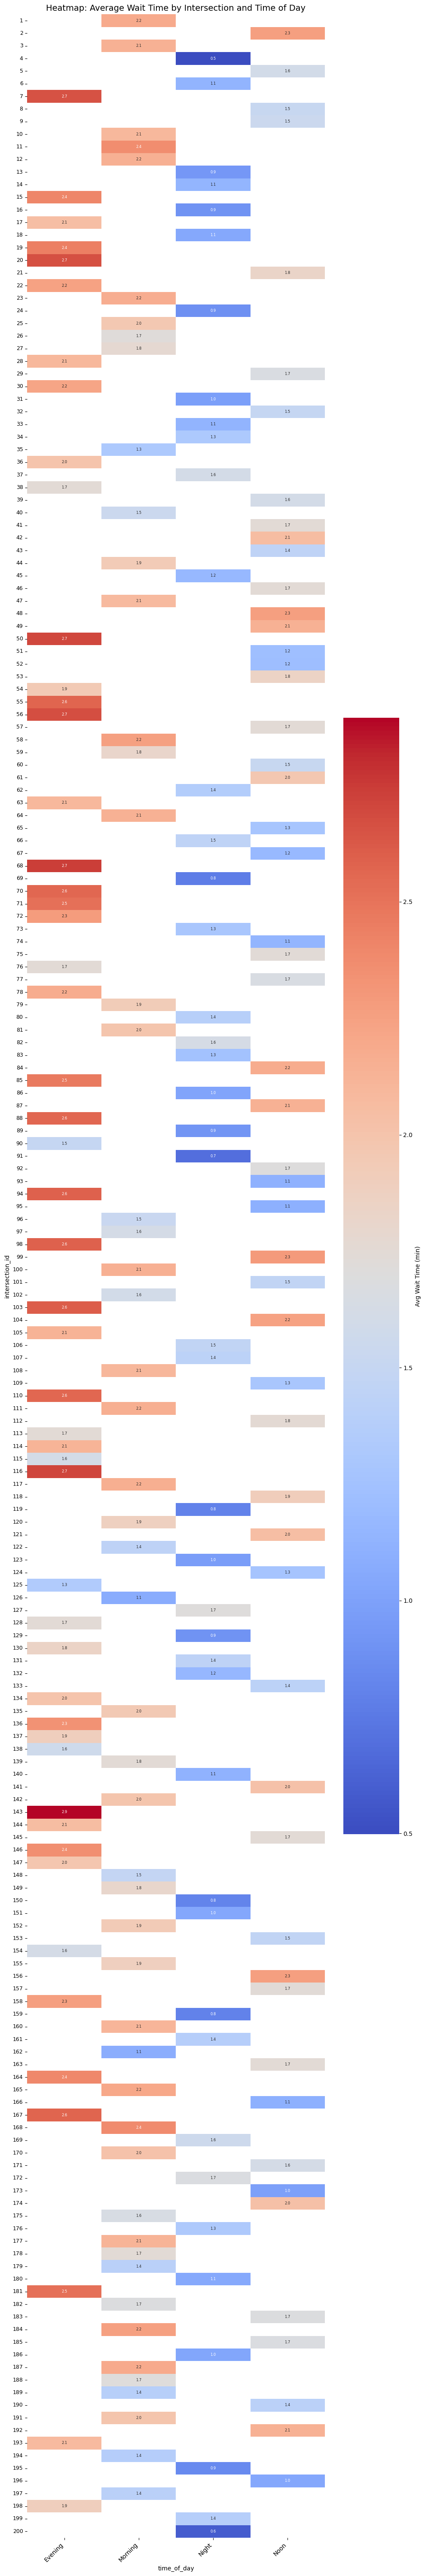

In [ ]:

heat_data = df.pivot_table(
    values='wait_time_minutes',
    index='intersection_id',
    columns='time_of_day',
    aggfunc='mean'
)
num_rows, num_cols = heat_data.shape
fig_width = max(10, num_cols * 1.5)
fig_height = max(8, num_rows * 0.3)

plt.figure(figsize=(fig_width, fig_height))
if num_rows > 50:
    annot_size = 6
elif num_rows > 25:
    annot_size = 8
else:
    annot_size = 10
sns.heatmap(
    heat_data,
    annot=True,
    cmap='coolwarm',
    fmt=".1f",
    annot_kws={"size": annot_size},
    cbar_kws={'label': 'Avg Wait Time (min)'}
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=9)
plt.title("Heatmap: Average Wait Time by Intersection and Time of Day", fontsize=14)
plt.tight_layout()
print("heatmap between time_of_day and avg_wait_time_minutes")
plt.show()




Line Trend: Wait Time vs Time of Day



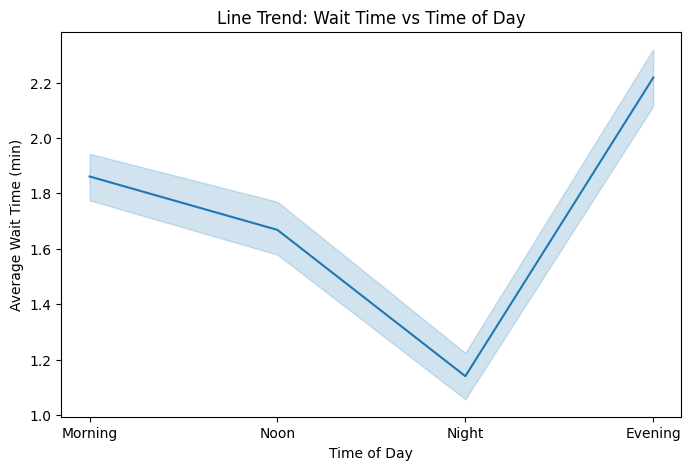

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x='time_of_day', y='wait_time_minutes', data=df, estimator='mean')
plt.title("Line Trend: Wait Time vs Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Wait Time (min)")
print("\nLine Trend: Wait Time vs Time of Day\n")
plt.show()